# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime 

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [8]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
# Set the API base URL
base_url = f"https://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
       city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
       city_lat = city_weather["coord"]["lat"]
       city_lng = city_weather["coord"]["lon"]
       city_max_temp = city_weather["main"]["temp_max"]
       city_humidity = city_weather["main"]["humidity"]
       city_clouds = city_weather["clouds"]["all"]
       city_wind = city_weather["wind"]["speed"]
       city_country = city_weather["sys"]["country"]
       city_date = city_weather["dt"]

        # Append the City information into city_data list
       city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | machico
Processing Record 2 of Set 1 | forster
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | alice springs
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | iqaluit
Processing Record 7 of Set 1 | kerikeri
Processing Record 8 of Set 1 | margaret river
Processing Record 9 of Set 1 | timmins
Processing Record 10 of Set 1 | tiksi
Processing Record 11 of Set 1 | dire
Processing Record 12 of Set 1 | tolanaro
Processing Record 13 of Set 1 | ivdel'
Processing Record 14 of Set 1 | leshan
Processing Record 15 of Set 1 | puerto deseado
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | pacific grove
Processing Record 18 of Set 1 | avarua
Processing Record 19 of Set 1 | aasiaat
Processing Record 20 of Set 1 | waitangi
Processing Record 21 of Set 1 | tofol
Processing Record 22 of Set 1 | ulsteinvik
Processing Record 23 of Set 1 | rozdil

Processing Record 37 of Set 4 | katsuren-haebaru
Processing Record 38 of Set 4 | uturoa
Processing Record 39 of Set 4 | palikir - national government center
Processing Record 40 of Set 4 | rodas
Processing Record 41 of Set 4 | polokwane
Processing Record 42 of Set 4 | severo-yeniseyskiy
Processing Record 43 of Set 4 | mount pearl
Processing Record 44 of Set 4 | fandriana
Processing Record 45 of Set 4 | shakawe
Processing Record 46 of Set 4 | mitsamiouli
Processing Record 47 of Set 4 | parang
Processing Record 48 of Set 4 | heihe
Processing Record 49 of Set 4 | carnarvon
Processing Record 0 of Set 5 | palmer
Processing Record 1 of Set 5 | nepalgunj
Processing Record 2 of Set 5 | goundam
Processing Record 3 of Set 5 | maubara
City not found. Skipping...
Processing Record 4 of Set 5 | rujewa
Processing Record 5 of Set 5 | paita
City not found. Skipping...
Processing Record 6 of Set 5 | salekhard
Processing Record 7 of Set 5 | tucuma
Processing Record 8 of Set 5 | tadine
Processing Record 

Processing Record 29 of Set 8 | illela
Processing Record 30 of Set 8 | santiago
Processing Record 31 of Set 8 | fale old settlement
Processing Record 32 of Set 8 | madalena
Processing Record 33 of Set 8 | vorgashor
Processing Record 34 of Set 8 | xilin hot
Processing Record 35 of Set 8 | bodri
Processing Record 36 of Set 8 | sitka
Processing Record 37 of Set 8 | kalmunai
Processing Record 38 of Set 8 | tachilek
City not found. Skipping...
Processing Record 39 of Set 8 | singaraja
Processing Record 40 of Set 8 | mejit
Processing Record 41 of Set 8 | qal'at bishah
City not found. Skipping...
Processing Record 42 of Set 8 | elda
Processing Record 43 of Set 8 | puerto gaitan
Processing Record 44 of Set 8 | kavaratti
Processing Record 45 of Set 8 | zonguldak
Processing Record 46 of Set 8 | nova vicosa
Processing Record 47 of Set 8 | chibougamau
Processing Record 48 of Set 8 | boguchany
Processing Record 49 of Set 8 | shahganj
Processing Record 0 of Set 9 | agdas
Processing Record 1 of Set 9

Processing Record 18 of Set 12 | mlyniv
Processing Record 19 of Set 12 | cascais
Processing Record 20 of Set 12 | thai nguyen
Processing Record 21 of Set 12 | ugoofaaru
Processing Record 22 of Set 12 | garissa
Processing Record 23 of Set 12 | el matama
Processing Record 24 of Set 12 | san juan colorado
Processing Record 25 of Set 12 | mtwara
Processing Record 26 of Set 12 | union beach
Processing Record 27 of Set 12 | we
City not found. Skipping...
Processing Record 28 of Set 12 | jiaxing
Processing Record 29 of Set 12 | vytegra
Processing Record 30 of Set 12 | turgen
Processing Record 31 of Set 12 | tomatlan
Processing Record 32 of Set 12 | veraval
Processing Record 33 of Set 12 | den burg
Processing Record 34 of Set 12 | kybartai
Processing Record 35 of Set 12 | baluntaicun
City not found. Skipping...
Processing Record 36 of Set 12 | ceerigaabo
Processing Record 37 of Set 12 | tsiombe
Processing Record 38 of Set 12 | deniliquin
Processing Record 39 of Set 12 | manda
Processing Record

In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [12]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,machico,32.7000,-16.7667,27.85,75,75,2.06,PT,1691430413
1,forster,-32.1667,152.5167,8.87,92,54,2.21,AU,1691430414
2,bredasdorp,-34.5322,20.0403,10.99,85,0,1.71,ZA,1691430414
3,alice springs,-23.7000,133.8833,6.75,76,2,0.00,AU,1691430223
4,yellowknife,62.4560,-114.3525,18.29,48,75,4.63,CA,1691430170


In [13]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,machico,32.7000,-16.7667,27.85,75,75,2.06,PT,1691430413
1,forster,-32.1667,152.5167,8.87,92,54,2.21,AU,1691430414
2,bredasdorp,-34.5322,20.0403,10.99,85,0,1.71,ZA,1691430414
3,alice springs,-23.7000,133.8833,6.75,76,2,0.00,AU,1691430223
4,yellowknife,62.4560,-114.3525,18.29,48,75,4.63,CA,1691430170


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

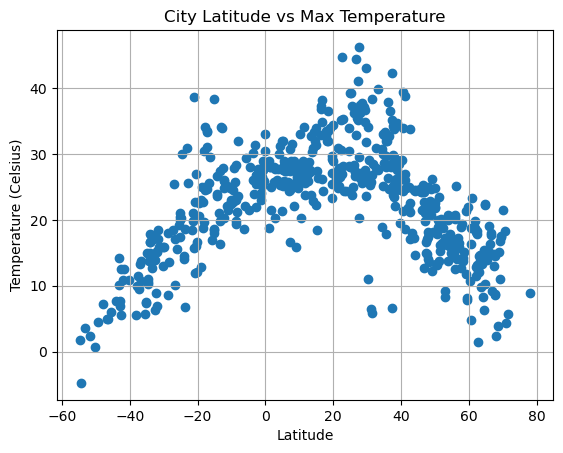

In [16]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker = 'o')

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

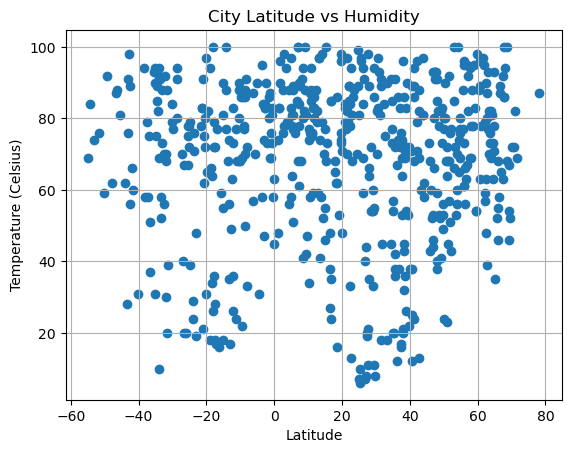

In [23]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker = 'o')

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

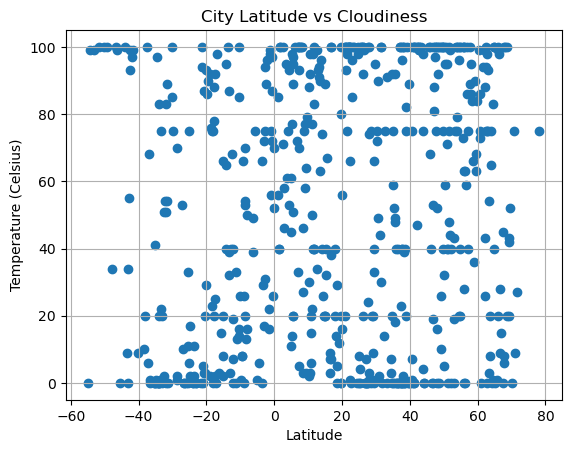

In [24]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker = 'o')

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

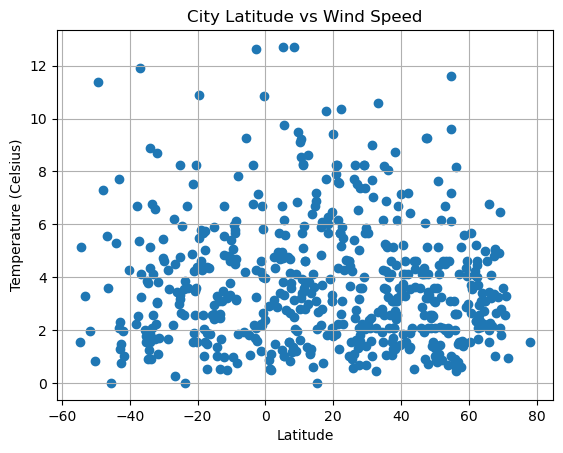

In [25]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker = 'o')

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


The r-value is:0.05284795410412181


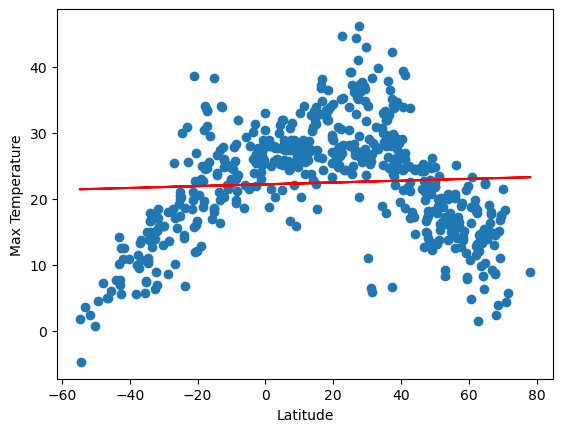

In [29]:
# Define a function to create Linear Regression plots
#LAT VS MAX TEMP
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,260),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
print(f"The r-value is:{rvalue}")
plt.show()

In [27]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,machico,32.7000,-16.7667,27.85,75,75,2.06,PT,1691430413
4,yellowknife,62.4560,-114.3525,18.29,48,75,4.63,CA,1691430170
5,iqaluit,63.7506,-68.5145,9.85,76,20,3.09,CA,1691430180
8,timmins,48.4669,-81.3331,22.90,53,100,2.57,CA,1691430249
9,tiksi,71.6872,128.8694,5.77,69,27,0.93,RU,1691430418


In [28]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,forster,-32.1667,152.5167,8.87,92,54,2.21,AU,1691430414
2,bredasdorp,-34.5322,20.0403,10.99,85,0,1.71,ZA,1691430414
3,alice springs,-23.7000,133.8833,6.75,76,2,0.00,AU,1691430223
6,kerikeri,-35.2268,173.9474,7.52,94,41,1.79,NZ,1691430416
7,margaret river,-33.9500,115.0667,16.64,91,83,8.90,AU,1691430417


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:-0.637464765556306


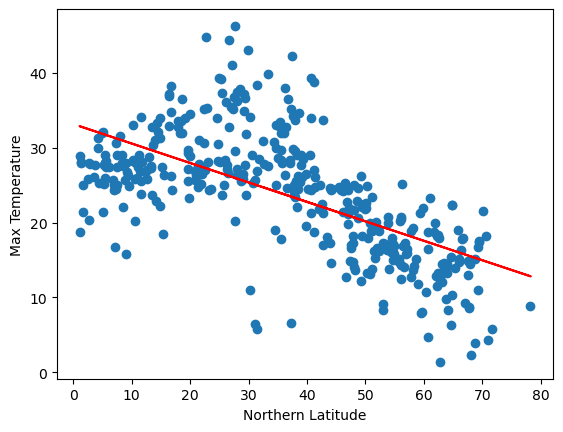

In [30]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,270),fontsize=15,color="red")
plt.xlabel('Northern Latitude')
plt.ylabel('Max Temperature')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:0.8073947569120301


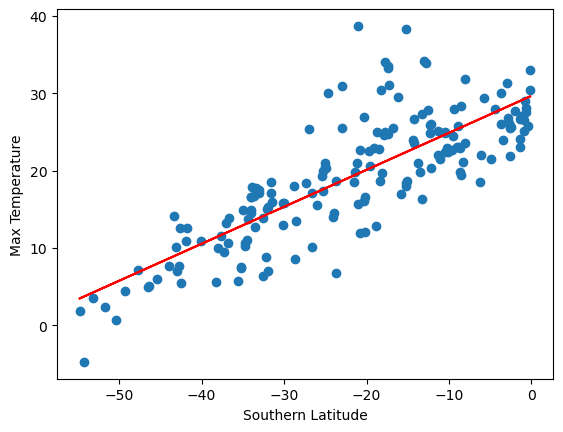

In [31]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,295),fontsize=15,color="red")
plt.xlabel('Southern Latitude')
plt.ylabel('Max Temperature')
print(f"The r-value is:{rvalue}")
plt.show()

This plot indicates a strong correlation with an R value of .807.

### Humidity vs. Latitude Linear Regression Plot

The r-value is:-0.02597800325001106


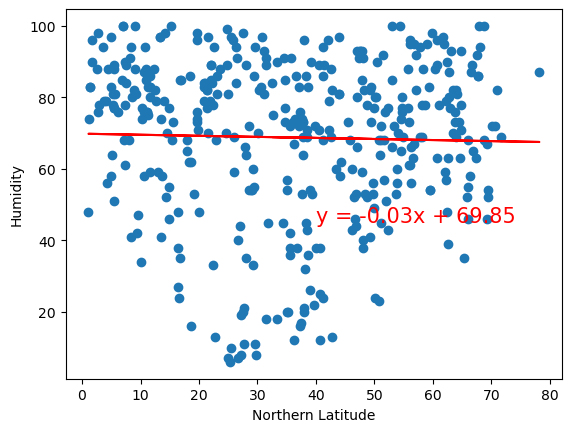

In [32]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,45),fontsize=15,color="red")
plt.xlabel('Northern Latitude')
plt.ylabel('Humidity')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:-0.03272324327949669


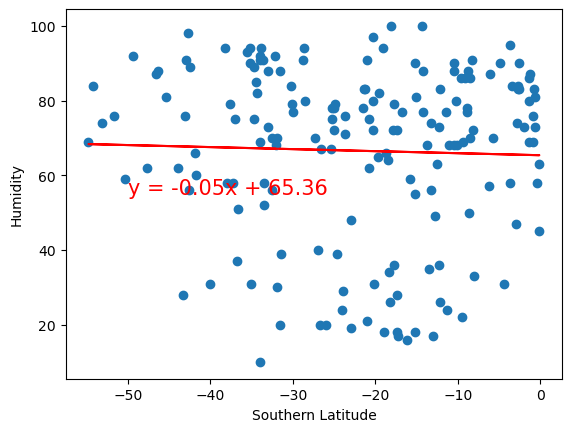

In [33]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,55),fontsize=15,color="red")
plt.xlabel('Southern Latitude')
plt.ylabel('Humidity')
print(f"The r-value is:{rvalue}")
plt.show()

This plot indicates no correlation or very weak with an R value of -.033

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:-0.00840543682566932


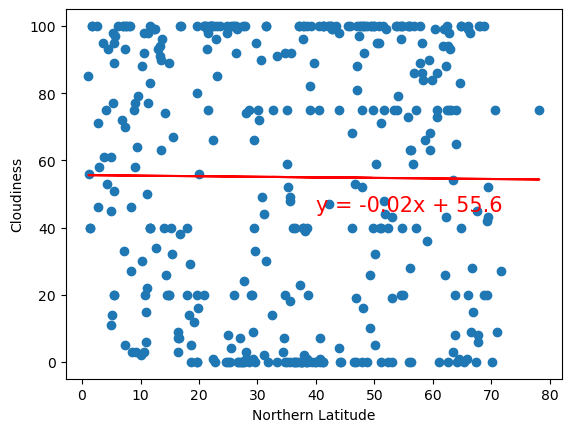

In [34]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,45),fontsize=15,color="red")
plt.xlabel('Northern Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:-0.002410217926584632


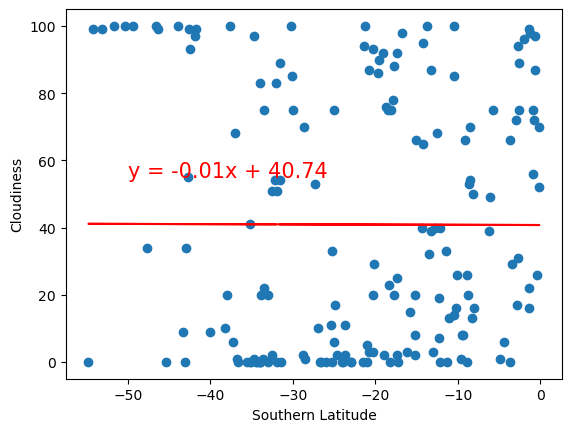

In [35]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,55),fontsize=15,color="red")
plt.xlabel('Southern Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is:{rvalue}")
plt.show()

This plot indicates no correlation or very weak with an R value of -.002.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:-0.16044991932931865


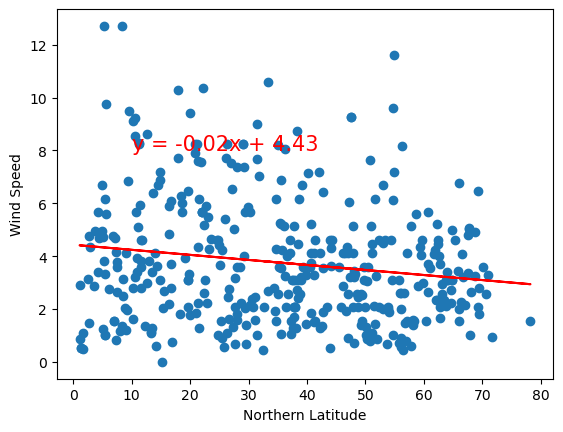

In [36]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,8),fontsize=15,color="red")
plt.xlabel('Northern Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:0.07532161122961402


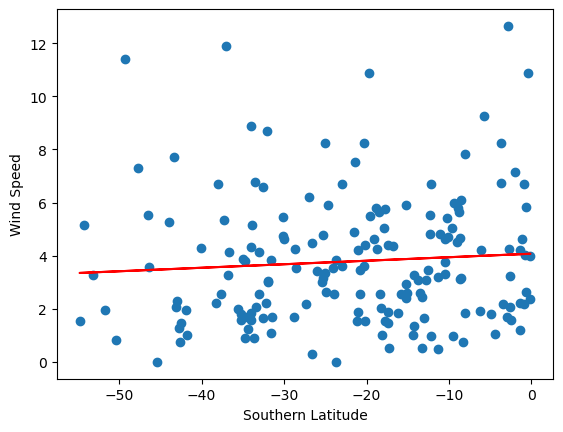

In [37]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,55),fontsize=15,color="red")
plt.xlabel('Southern Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is:{rvalue}")
plt.show()

This plot indicates no correlation or very weak with an R value of .075.